In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
# Create our data.

X_train = np.array([[0, 0],  # Class 1.
                   [0, 10],  # Class 2.
                   [10, 10], # Class 3.
                   [10, 0],  # Class 4.
                   [0, 1],   # etc. basically in corners.
                   [1, 1],
                   [0.5, 0.9],
                   [3.1, 3.7],
                   [3, 2],
                   [1, 7],
                   [2, 9],
                   [2.5, 8.6],
                   [3.5, 7.9],
                   [9, 9],
                   [8, 9],
                   [8.5, 8.5],
                   [7.9, 9.3],
                   [9, 1],
                   [8.5, 2],
                   [7.9, 3],
                   [7.5, 1.9]]) 

y_train = np.array([0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [47]:
# Visualize the data.

print(f"unique classes {np.unique(y_train)}")
print(f"class representation {y_train[:10]}")
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [0 1 2 3 0 0 0 0 0 1]
shape of X_train: (21, 2), shape of y_train: (21,)


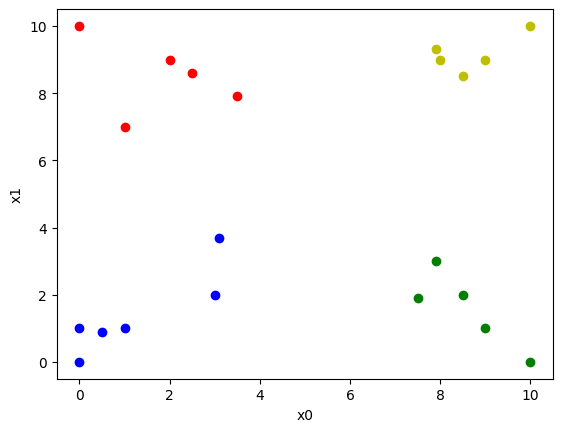

In [49]:
# Plot all the data.

class0 = X_train[y_train == 0]
class1 = X_train[y_train == 1]
class2 = X_train[y_train == 2]
class3 = X_train[y_train == 3]

plt.scatter(class0[:, 0], class0[:, 1], c='b', marker='o')
plt.scatter(class1[:, 0], class1[:, 1], c='r', marker='o')
plt.scatter(class2[:, 0], class2[:, 1], c='y', marker='o')
plt.scatter(class3[:, 0], class3[:, 1], c='g', marker='o')

plt.xlabel('x0')
plt.ylabel('x1')

plt.show()

In [50]:
# Construct the neural network.
# Notice 'linear' as activation for output layer.
# Linear output layer combined with 'from_logits=True' in loss function gives much better results,
# when training for multiclass classification.

model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

In [53]:
# Specify loss function.
# For multiclasss classification we use 'SparseCategoricalCrossentropy'.
# Instead of regression algorithm we specify 'Adam' algorithm which can modify learning late alpha on the go.

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

In [54]:
# Train the model.

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
1/1 [==============================] - 0s 146ms/step - loss: 0.7595
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7758
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7241
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8026
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6697
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6742
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.6680
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 9/200
1/1 [==============================] - 0s 1000us/step - loss: 0.6462
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6311
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6157
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5940
Epoch 13/200
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 1000us/step - loss: 0.1003
Epoch 105/200
1/1 [==============================] - 0s 1000us/step - loss: 0.0987
Epoch 106/200
1/1 [==============================] - 0s 999us/step - loss: 0.0974
Epoch 107/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0960
Epoch 108/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0947
Epoch 109/200
1/1 [==============================] - 0s 999us/step - loss: 0.0935
Epoch 110/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0922
Epoch 111/200
1/1 [==============================] - 0s 1000us/step - loss: 0.0910
Epoch 112/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 113/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 114/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0876
Epoch 115/200
1/1 [==============================] - 0s 1000us/step - loss: 0.0865
Epoch 116/200
1/1 [===================

In [58]:
# Predict.

X_predict = np.array([[0.23, 3.6], [7.8, 1.7], [9.4, 7.9], [1.55, 7.99]])

predictions = model.predict(X_predict)

print(f'{predictions}')

1/1 [==============================] - 0s 9ms/step
[[  2.148818    -0.64288807   7.021181    -7.471434  ]
 [ 21.134417   -82.84266     -0.3263073   25.81121   ]
 [  7.457367   -23.626703     4.966756     1.8347006 ]
 [ -0.7888433   12.075968     8.158066   -12.621292  ]]


In [59]:
# Something ain't right. Need to continue course.